<a href="https://colab.research.google.com/github/jiayiQ/D3/blob/main/_Charting_Excercise_%26_Updated_Accessibility_Charts_OliviaQiu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loding

In [31]:
df = pd.read_csv('/content/sample_data/reno_nevada.csv')

In [32]:
df.head(2000)

,number,Addresses,Price,Price Type,Rent Estimate,Property Type,Number of Bedrooms,Number of Bathrooms,Square Feet,YTD,Address Link
0,1,"Spearhead Way, Reno, NV 89506","$627,783",Estimated Market Value,$1820/m,Single-Family,3.0,2.5,2080.0,99%,https://www.foreclosure.com/address/Spearhead-...
1,2,"Montello St, Reno, NV 89512","$332,441",Estimated Market Value,$1090/m,Single-Family,3.0,1.0,1000.0,169%,https://www.foreclosure.com/address/Montello-S...
2,3,"Rider Trl, Reno, NV 89511",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.foreclosure.com/address/Rider-Trl-...
3,4,"N Arlington Ave Unit 20k, Reno, NV 89501","$400,224",Estimated Market Value,$930/m,Commercial,NaN,NaN,NaN,120%,https://www.foreclosure.com/address/N-Arlingto...
4,5,"Honeysuckle Dr, Reno, NV 89506","$330,867",Estimated Market Value,$1480/m,Condo,3.0,2.0,1517.0,117%,https://www.foreclosure.com/address/Honeysuckl...
...,...,...,...,...,...,...,...,...,...,...,...
617,618,"S Virginia St, Reno, NV 89502",NaN,NaN,NaN,Commercial,NaN,NaN,11678.0,NaN,https://www.foreclosure.com/address/S-Virginia...
618,619,"Hillcrest Dr Apt 26, Reno, NV 89509",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.foreclosure.com/address/Hillcrest-...
619,620,"Geiger Grade Rd # 1415, Reno, NV 89521",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.foreclosure.com/address/Geiger-Gra...
620,621,"E Hidden Valley Dr, Reno, NV 89502","$915,809",Estimated Market Value,$1950/m,Single-Family,5.0,3.5,4036.0,119%,https://www.foreclosure.com/address/E-Hidden-V...




```
# This is formatted as code
```

# Visualizations, Oct 3: Charting exercise


<ipython-input-19-56e73b64b020>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace(',', '').str.replace('$', '').astype(float)


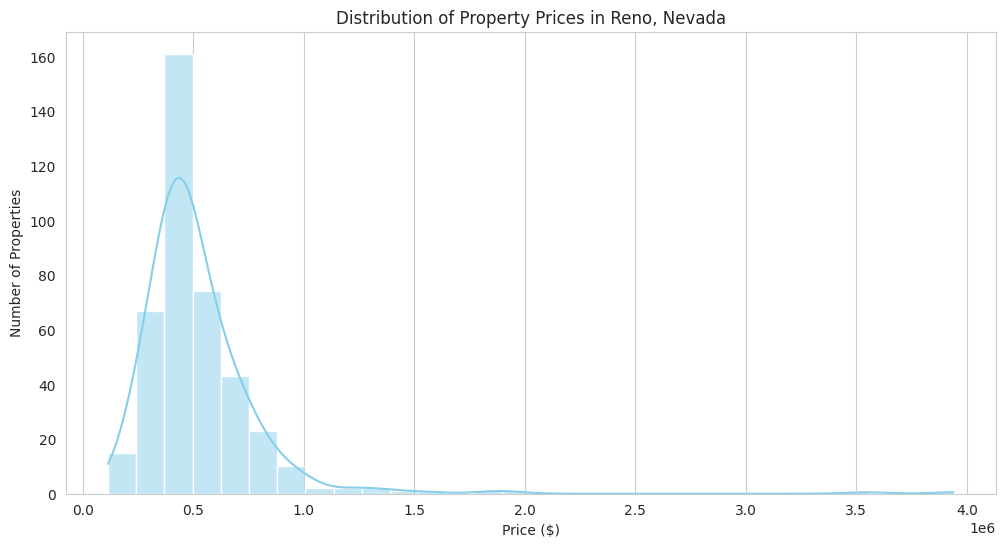

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning the Price column
df['Price'] = df['Price'].str.replace(',', '').str.replace('$', '').astype(float)

# Plotting the distribution of property prices
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Property Prices in Reno, Nevada')
plt.xlabel('Price ($)')
plt.ylabel('Number of Properties')
plt.grid(axis='y')
plt.show()



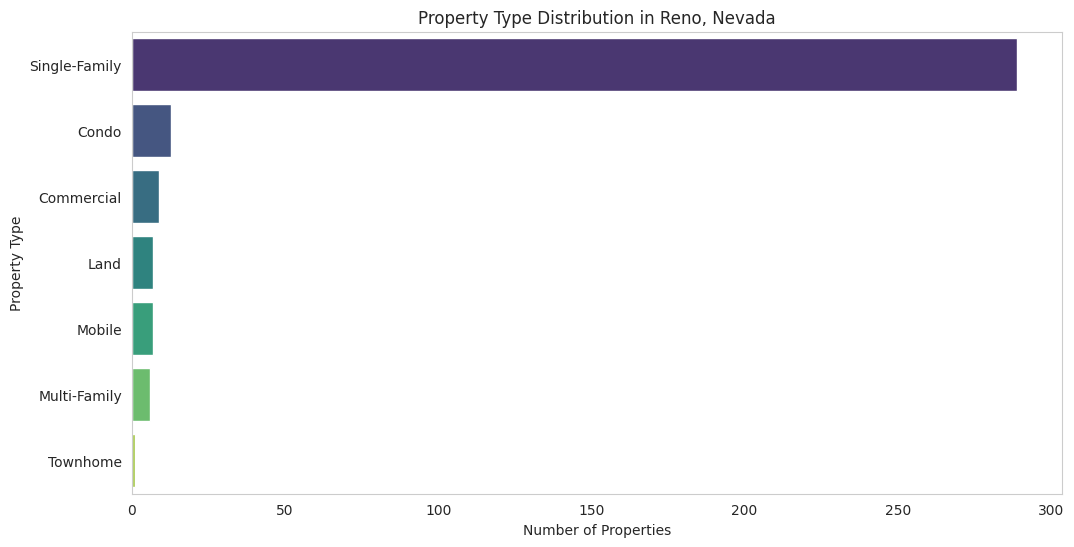

In [20]:
# Plotting the distribution of property types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Property Type', order=df['Property Type'].value_counts().index, palette='viridis')
plt.title('Property Type Distribution in Reno, Nevada')
plt.xlabel('Number of Properties')
plt.ylabel('Property Type')
plt.grid(axis='x')
plt.show()


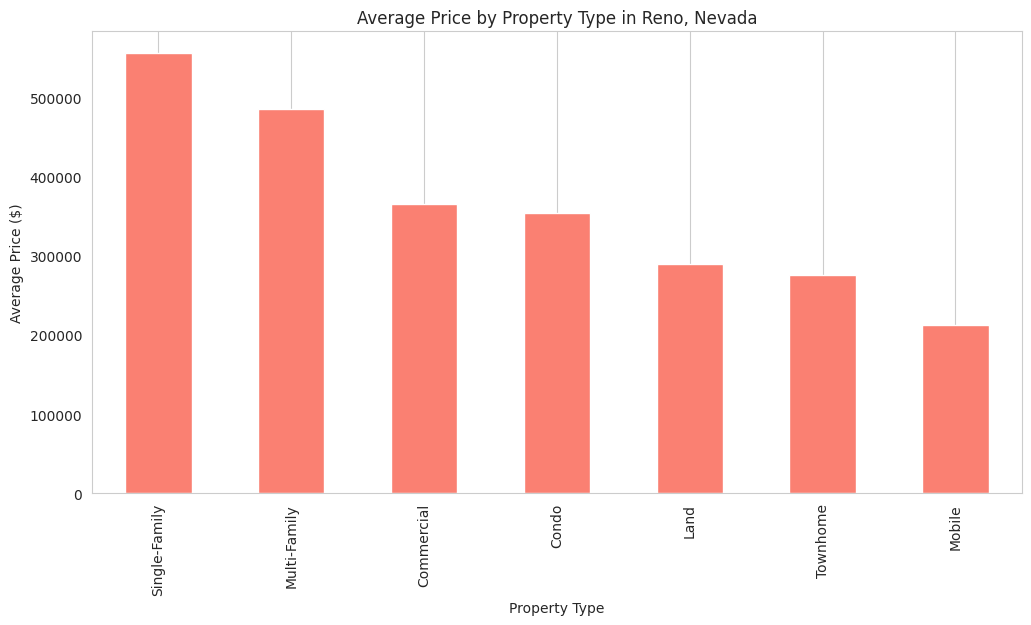

In [21]:
# Calculating average price by property type
avg_price_by_type = df.groupby('Property Type')['Price'].mean().sort_values(ascending=False)

# Plotting the average price by property type
plt.figure(figsize=(12, 6))
avg_price_by_type.plot(kind='bar', color='salmon')
plt.title('Average Price by Property Type in Reno, Nevada')
plt.xlabel('Property Type')
plt.ylabel('Average Price ($)')
plt.grid(axis='y')
plt.show()


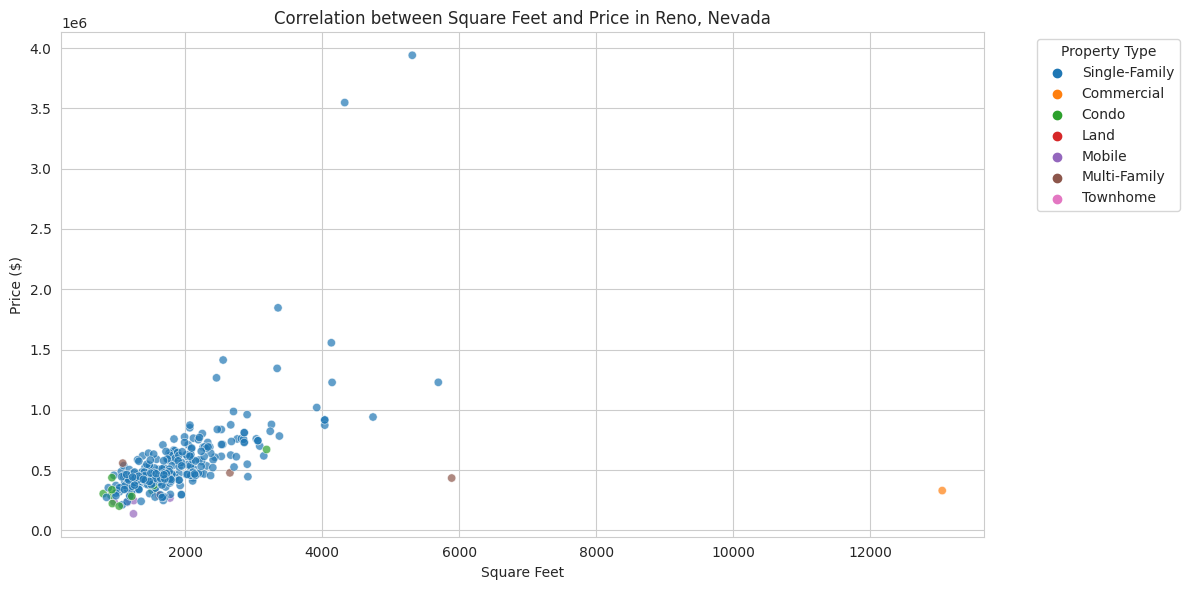

In [22]:
# Scatter plot of Square Feet vs. Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Square Feet'], y=df['Price'], hue=df['Property Type'], palette='tab10', alpha=0.7)
plt.title('Correlation between Square Feet and Price in Reno, Nevada')
plt.xlabel('Square Feet')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


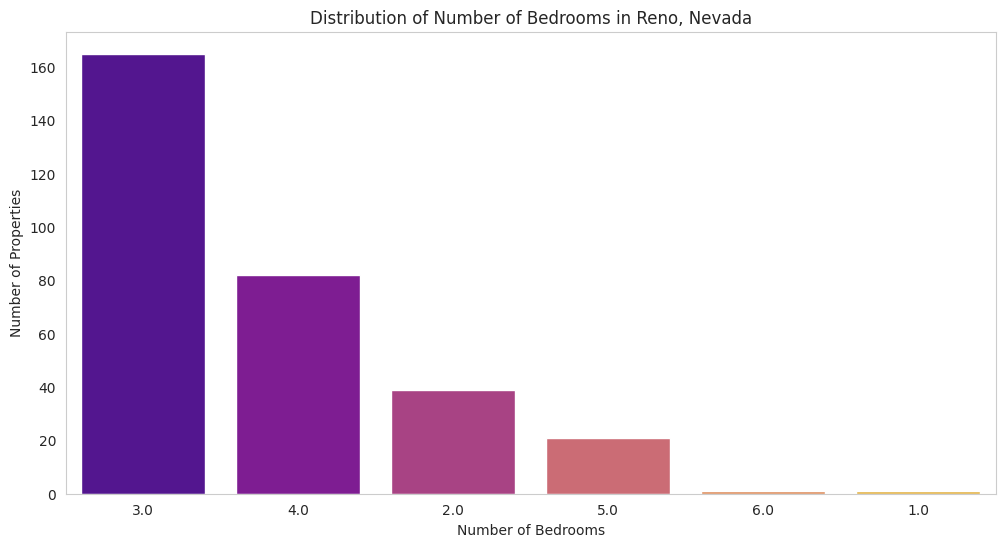

In [23]:
# Plotting the distribution of number of bedrooms
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Number of Bedrooms', palette='plasma', order=df['Number of Bedrooms'].value_counts().index)
plt.title('Distribution of Number of Bedrooms in Reno, Nevada')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Properties')
plt.grid(axis='y')
plt.show()


#Visualizations, Oct 10, Accessibility on your charts, alt txt, colorblind tests



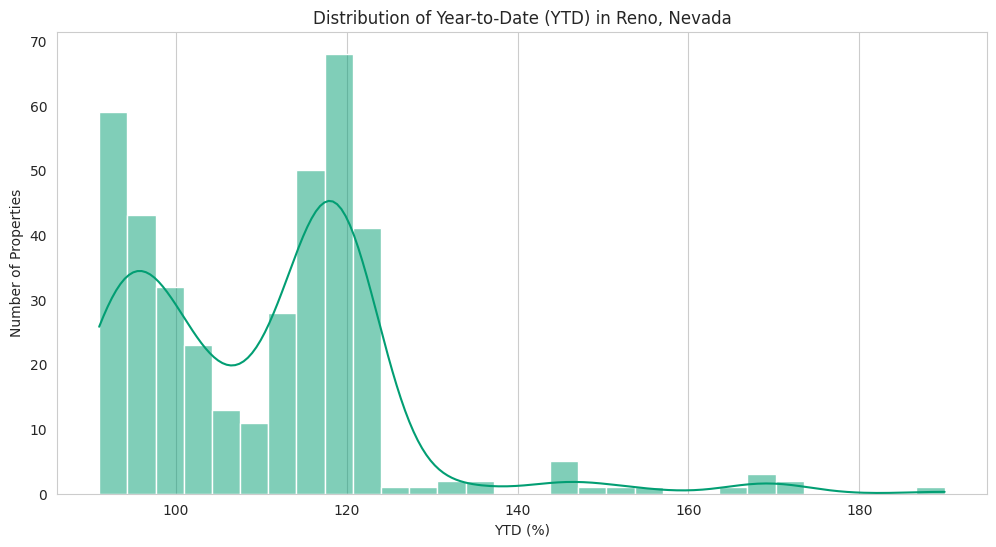

In [26]:
# Ensuring the YTD column is of string type and then cleaning
df['YTD'] = df['YTD'].astype(str).str.replace('%', '').astype(float)

# Plotting the distribution of YTD
plt.figure(figsize=(12, 6))
sns.histplot(df['YTD'], bins=30, kde=True, color=sns.color_palette("colorblind")[2])
plt.title('Distribution of Year-to-Date (YTD) in Reno, Nevada')
plt.xlabel('YTD (%)')
plt.ylabel('Number of Properties')
plt.grid(axis='y')
plt.show()


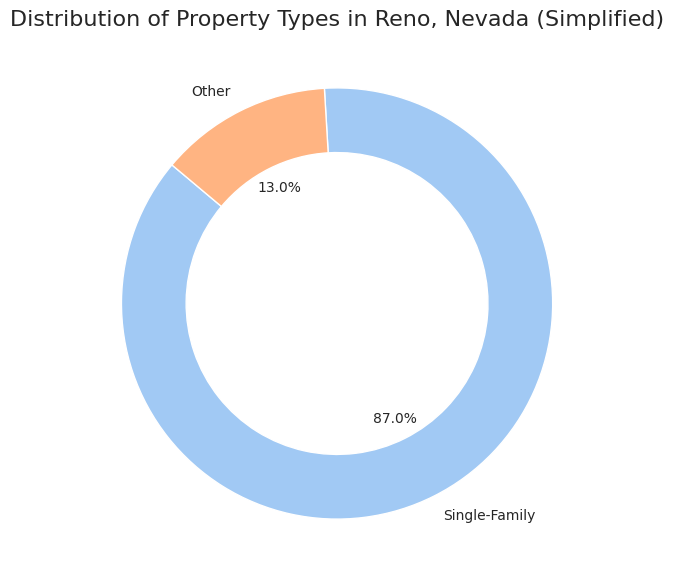

In [28]:
# Grouping smaller categories into "Other"
threshold = 0.05  # 5% threshold for individual categories
series = property_type_counts / property_type_counts.sum()
mask = series > threshold
tail = series.loc[~mask]

# Replace small categories with "Other"
series = series.loc[mask]
series['Other'] = tail.sum()

# Colors for the pie chart
colors = sns.color_palette("pastel", len(series))

# Plotting the updated pie chart
plt.figure(figsize=(10, 7))
plt.pie(series, labels=series.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribution of Property Types in Reno, Nevada (Simplified)', fontsize=16)
plt.show()



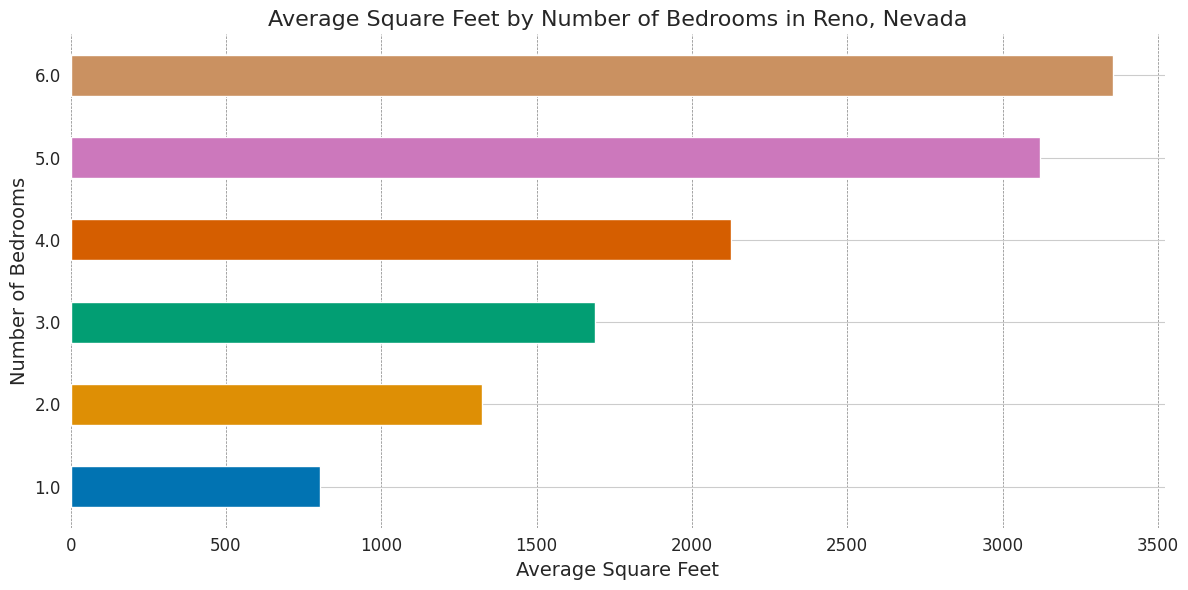

In [29]:
# Calculating average square feet by number of bedrooms
avg_sqft_by_bedrooms = df.groupby('Number of Bedrooms')['Square Feet'].mean().sort_values()

# Plotting the average square feet by number of bedrooms in a clean, minimalist style
plt.figure(figsize=(12, 6))
avg_sqft_by_bedrooms.plot(kind='barh', color=sns.color_palette("colorblind"), edgecolor='white')
plt.title('Average Square Feet by Number of Bedrooms in Reno, Nevada', fontsize=16)
plt.ylabel('Number of Bedrooms', fontsize=14)
plt.xlabel('Average Square Feet', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='grey')
plt.box(False)
plt.tight_layout()
plt.show()

# Alt text description for the visualization
alt_text_sqft_bedrooms = """
Horizontal bar chart depicting the average square footage of properties based on the number of bedrooms in Reno, Nevada.
Properties with more bedrooms generally have a larger square footage.
"""


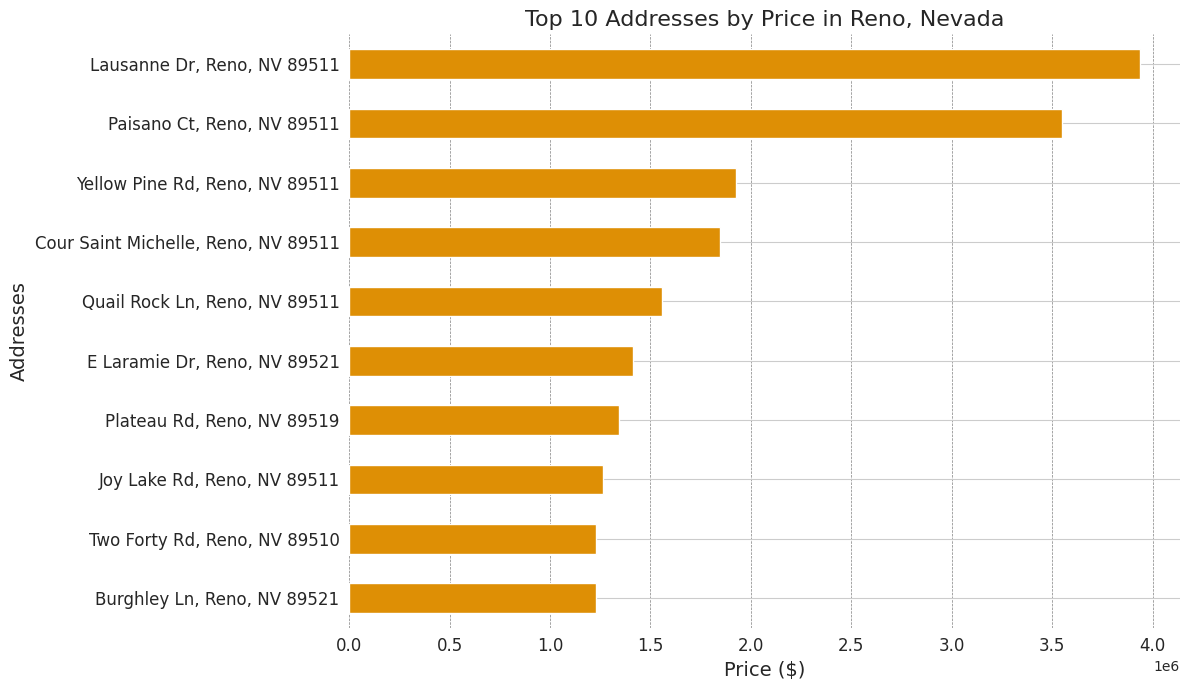

In [30]:
# Selecting top 10 addresses by price
top_addresses = df.nlargest(10, 'Price')[['Addresses', 'Price']].set_index('Addresses')

# Plotting the top 10 addresses by price
plt.figure(figsize=(12, 7))
top_addresses.plot(kind='barh', legend=False, color=sns.color_palette("colorblind")[1], edgecolor='white', ax=plt.gca())
plt.title('Top 10 Addresses by Price in Reno, Nevada', fontsize=16)
plt.ylabel('Addresses', fontsize=14)
plt.xlabel('Price ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='grey')
plt.box(False)
plt.tight_layout()
plt.show()

# Alt text description for the visualization
alt_text_top_addresses = """
Horizontal bar chart showcasing the top 10 addresses with the highest property prices in Reno, Nevada.
The addresses are sorted from highest to lowest price.
"""
